# Recreating the original visualization which can be found [here](https://nhltoseattle.com/2013/02/10/nhl-attendance-through-feb-9th/).

In [1]:
#variables
max_season = '2017-18'
#min_season = '2016-17'
min_season = '2000-01'

In [2]:
import math
import numpy as np 
import pandas as pd
from PIL import Image

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{xcolor}')
rc('pgf', preamble=r'\usepackage{xcolor}', rcfonts=False)

import matplotlib.pyplot as plt
from matplotlib import lines
import seaborn as sns

pd.options.mode.chained_assignment = None # surpress is copy warning

In [3]:
df = pd.read_csv('../NHL Attendance.csv')
print(df.columns)
print(df.head())

Index(['SEASON', 'RANK', 'TEAM', 'HOME GAMES', ' HOME ATTENDANCE ',
       'ROAD GAMES', ' ROAD ATTENDANCE ', 'TOTAL GAMES', ' TOTAL ATTENDANCE '],
      dtype='object')
    SEASON  RANK          TEAM  HOME GAMES  HOME ATTENDANCE   ROAD GAMES  \
0  2017-18     1       Chicago          41          887,794           41   
1  2017-18     2      Montreal          41          873,283           41   
2  2017-18     3  Philadelphia          41          800,214           41   
3  2017-18     4       Detroit          41          800,115           41   
4  2017-18     5       Toronto          41          786,677           41   

   ROAD ATTENDANCE   TOTAL GAMES  TOTAL ATTENDANCE   
0          723,773            82         1,611,567   
1          733,736            82         1,607,019   
2          702,781            82         1,502,995   
3          717,295            82         1,517,410   
4          751,940            82         1,538,617   


In [4]:
def clean_numeric_column(df, column_name):
    series = df[column_name].str.strip()
    series = series.str.replace(',', '')
    series = pd.to_numeric(series)
    df[column_name] = series
    return df

df = df.query('TEAM != "Vegas"')
df = clean_numeric_column(df, ' TOTAL ATTENDANCE ')
df = clean_numeric_column(df, ' HOME ATTENDANCE ')

In [5]:
prepared_df = df.groupby(['TEAM', 'SEASON']).sum()
prepared_df = prepared_df.reset_index(level=['TEAM', 'SEASON'])
prepared_df['AVERAGE HOME ATTENDANCE'] = prepared_df[' HOME ATTENDANCE '] / prepared_df['HOME GAMES']
prepared_df = prepared_df.sort_values(by='TEAM')

print(prepared_df[['TEAM', 'SEASON', 'AVERAGE HOME ATTENDANCE']].query('SEASON == @max_season').head())

       TEAM   SEASON  AVERAGE HOME ATTENDANCE
16  Anaheim  2017-18             16635.609756
33  Arizona  2017-18             13040.731707
50   Boston  2017-18             17565.000000
67  Buffalo  2017-18             18563.512195
84  Calgary  2017-18             18905.000000


       TEAM   SEASON  RANK  HOME GAMES   HOME ATTENDANCE   ROAD GAMES  \
16  Anaheim  2017-18    23          41             682060          41   
33  Arizona  2017-18    30          41             534670          41   
50   Boston  2017-18    19          41             720165          41   
67  Buffalo  2017-18    11          41             761104          41   
84  Calgary  2017-18     8          41             775105          41   

    TOTAL GAMES   TOTAL ATTENDANCE   AVERAGE HOME ATTENDANCE  \
16           82             1392344             16635.609756   
33           82             1250571             13040.731707   
50           82             1442257             17565.000000   
67           82             1473889             18563.512195   
84           82             1475959             18905.000000   

    MIN SEASON HOME ATTENDANCE  HOME ATTENDANCE CHANGE  
16                      553470                0.232334  
33                      583194               -0.083204  
50   

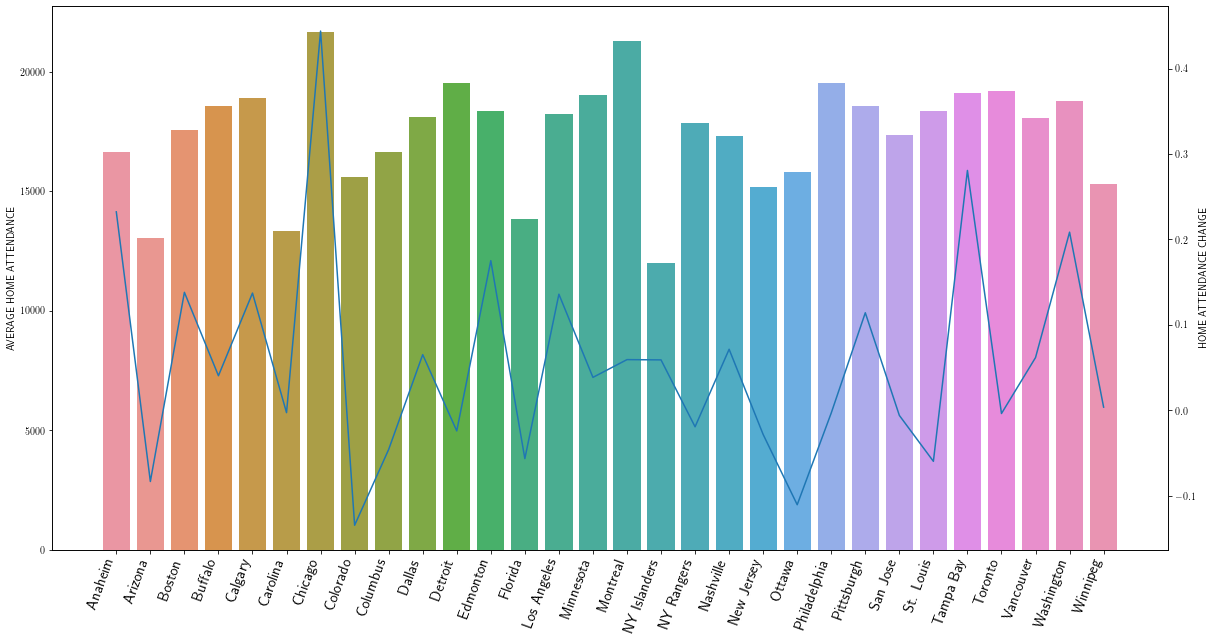

In [6]:
max_season_data = prepared_df.query('SEASON == @max_season')
min_season_data = prepared_df.query('SEASON == @min_season')

max_season_data['MIN SEASON HOME ATTENDANCE'] = min_season_data[' HOME ATTENDANCE '].tolist()
max_season_data['HOME ATTENDANCE CHANGE'] = \
    (max_season_data[' HOME ATTENDANCE '] / max_season_data['MIN SEASON HOME ATTENDANCE']) - 1
print(max_season_data.head())

# Drawing - Bar graph
fig1, ax1 = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x="TEAM", y="AVERAGE HOME ATTENDANCE", data=max_season_data)
plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right', size=15)
plt.xlabel('')

# Drawing - Line graph
ax2 = ax.twinx()
#season_2018.plot(x="TEAM", y="HOME GAMES", ax=ax2, legend=False, color="r")
sns.lineplot(ax=ax2, x="TEAM", y="HOME ATTENDANCE CHANGE", data=max_season_data)

plt.show();

### Since our data looks very different for Dallas and Carolina, double check our values

In [7]:
# Dallas and Carolina have differnt are mixed up in the origional graph. Likely due to Vegas.
def print_for_team_and_season(df, team, season):
    row = df.query('TEAM == @team and SEASON == @season')
    home_attendance = row.iloc[0][' HOME ATTENDANCE ']
    print(team + ' ' + season + ' - ' + str(home_attendance))
    return home_attendance


def print_change_percent(v1, v2):
    diff = v1 / v2
    percent = round((diff-1) * 100, 1)
    print('Change is ' + str(percent) + '%')
    
    
v1 = print_for_team_and_season(df, 'Carolina', max_season)  
v2 = print_for_team_and_season(df, 'Carolina', min_season)
print_change_percent(v1, v2)
print()

v1 =print_for_team_and_season(df, 'Dallas', max_season)  
v2 = print_for_team_and_season(df, 'Dallas', min_season)  
print_change_percent(v1, v2)  

Carolina 2017-18 - 546142
Carolina 2000-01 - 547584
Change is -0.3%

Dallas 2017-18 - 742511
Dallas 2000-01 - 697041
Change is 6.5%
